# EDOs de Segunda Ordem

Para mais informações, consultar a referência:

- Mark Newman: Computational Physics



Essencialmente, resolveremos a segunda lei de Newton nessa aula: 

$$\vec{F} = m\vec{a} = m \frac{d^2 \vec{r}}{dt^2}$$

Podemos escrever

$$\frac{d^2 x}{dt^2} = f(x, dx/dt,t)$$

Como por exemplo, um exemplo bastante complicado:

$$\frac{d^2 x}{dt^2} = (1/x) (\frac{dx}{dt})^2 + 2 \frac{dx}{dt} - x^3 e^{-4t}$$

Para resolver isso, basta que a gente crie variáveis auxiliares:

$$\frac{dx}{dt} = s$$

$$\frac{ds}{dt} = f(x,s,t)$$

Ou, vetorialmente:

$$\frac{d\vec{r}}{dt} = \vec{s}$$

$$\frac{d\vec{s}}{dt} = f(\vec{r},\vec{s},t)$$

Ou então

$$\frac{d}{dt}[x,y,z] = [s_1,s_2,s_3]$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Pêndulo

$$ F_x = mg sen \theta$$

Ou seja

$$ m\frac{d^2 \vec{r}}{dt^2} = - mg sen \theta$$

Como $dr = l d\theta$. 

$ l \frac{d^2 \theta}{dt^2} = - g sen \theta$ --> Logo, a equação a ser resolvida é dada por:

$$ \frac{d^2 \theta}{dt^2} = - \frac{g}{l} sen \theta$$

E analíticamente, utilizamos a aproximação para pequenas oscilações $(sen \theta \approx \theta)$

Como sabemos que $\omega = d\theta/dt$, podemos escrever:

$$
\frac{d\theta}{dt} = \omega
$$
$$
\frac{d\omega}{dt} = - \frac{g}{l} sen \theta
$$

Text(0, 0.5, 'omega')

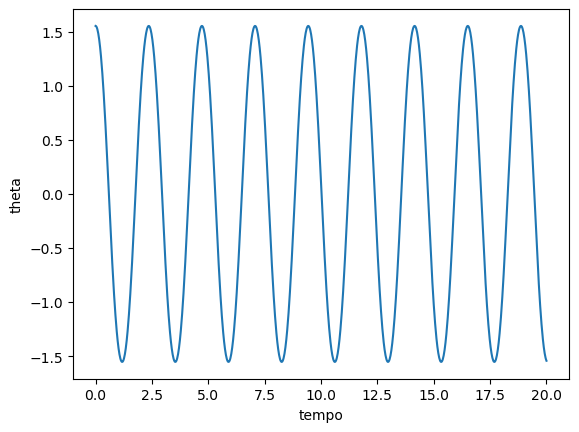

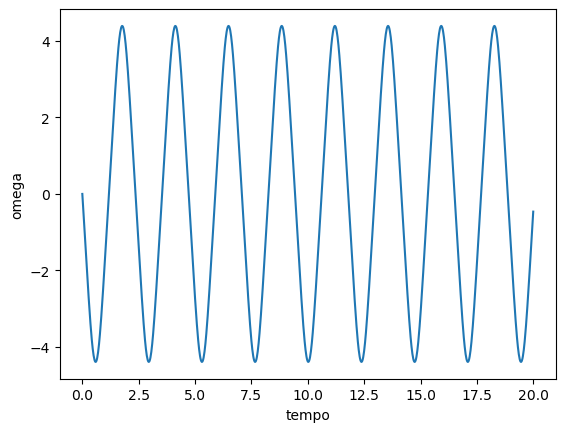

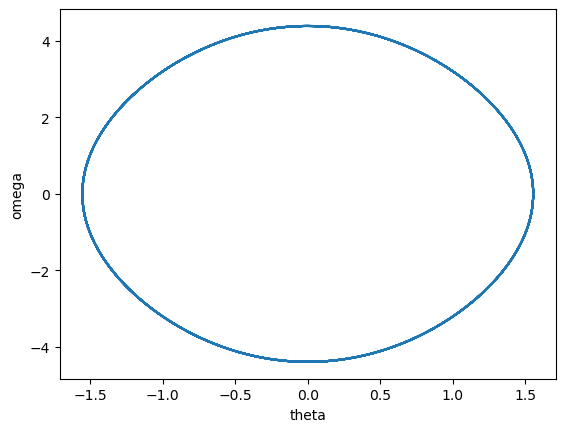

In [2]:
#Runge Kutta 4a ordem
g = 9.81
l = 1.0
ti = 0
tf = 20
N = 1000
h = (tf - ti)/N
ri = np.array([np.pi*89/180,0.]) #ri = (xi, omega i) --> condições iniciais
r = np.zeros([N+1, 2]) #1001 linhas por 2 colunas, para guardar ri e omega i
tp = np.linspace(ti,tf,1001)

r[0] = ri #ri já é um array 2D, entao estamos atribuindo ele à primeira linha de r

def f(r):
    theta = r[0]
    omega = r[1]
    f_theta = omega
    f_omega = -(g/l)*np.sin(theta)
    return np.array([f_theta, f_omega])

for i in range(N):
    k1 = h*f(r[i])
    k2 = h*f(r[i]+0.5*k1)
    k3 = h*f(r[i]+0.5*k2)
    k4 = h*f(r[i]+k3)
    ri += (k1+2*k2+2*k3+k4)/6
    r[i+1] = ri

plt.figure()
plt.plot(tp, r[:,0])
plt.xlabel('tempo')
plt.ylabel('theta')

plt.figure()
plt.plot(tp, r[:,1])
plt.xlabel('tempo')
plt.ylabel('omega')

plt.figure()
plt.plot(r[:,0], r[:,1])
plt.xlabel('theta')
plt.ylabel('omega')

Text(0, 0.5, 'omega')

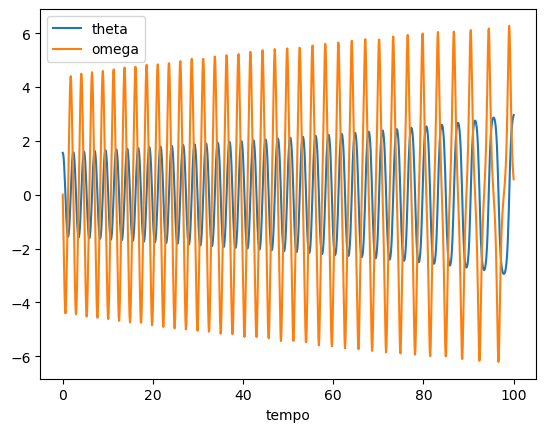

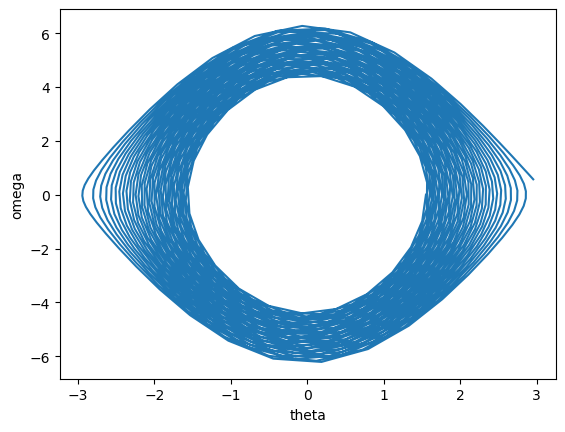

In [3]:
#Runge kutta 2a ordem
g = 9.81
l = 1.0
ti = 0
tf = 100
N = 1000
h = (tf - ti)/N
ri = np.array([np.pi*89/180,0.]) #ri = (xi, omega i) --> condições iniciais
r = np.zeros([N+1, 2]) #1001 linhas por 2 colunas, para guardar ri e omega i
tp = np.linspace(ti,tf,1001)

r[0] = ri #ri já é um array 2D, entao estamos atribuindo ele à primeira linha de r

def f(r):
    theta = r[0]
    omega = r[1]
    f_theta = omega
    f_omega = -(g/l)*np.sin(theta)
    return np.array([f_theta, f_omega])

for i in range(N):
    k1 = h*f(r[i])
    k2 = h*f(r[i]+0.5*k1)
    ri += k2
    r[i+1] = ri

plt.figure()
plt.plot(tp, r[:,0], label='theta')
plt.plot(tp, r[:,1], label='omega')
plt.xlabel('tempo')
plt.legend()

plt.figure()
plt.plot(r[:,0], r[:,1])
plt.xlabel('theta')
plt.ylabel('omega')

o método de Runge kutta de segunda ordem apresenta imprecisão para t=100

Podemos corrigir isso com o método de Verlet

## Método de Verlet


Text(0, 0.5, 'omega')

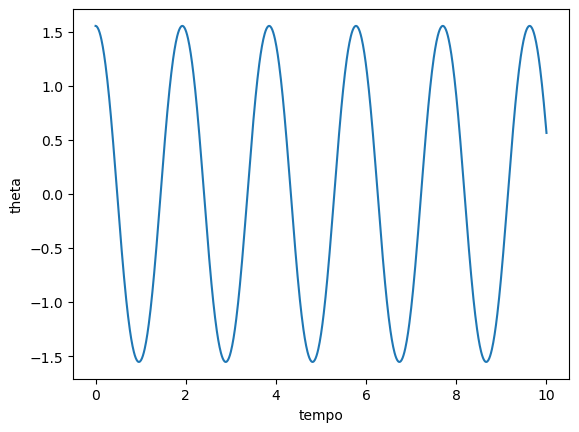

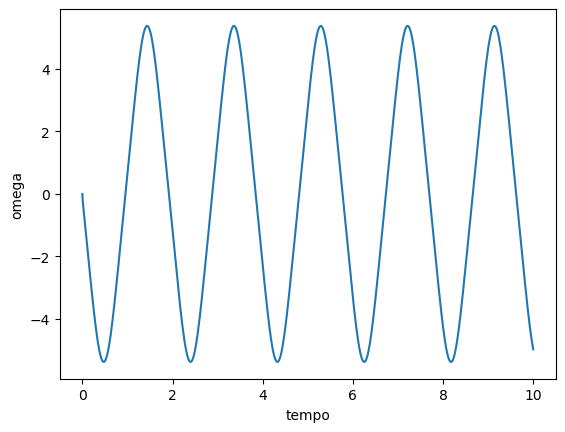

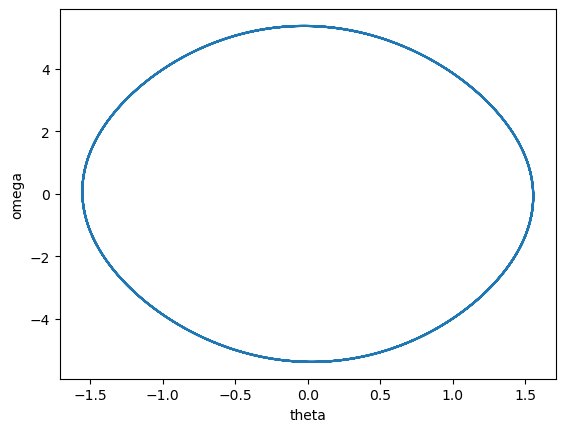

In [4]:
#Verlet
g = 9.81
l = 1.0
ti = 0
tf = 10
N = 1000
h = (tf - ti)/N
ri = np.array([np.pi*89/180,0.]) #ri = (xi, omega i) --> condições iniciais
r = np.zeros([N+1, 2]) #1001 linhas por 2 colunas, para guardar ri e omega i
tp = np.linspace(ti,tf,1001)
v = np.zeros([N+1, 2])

r[0] = ri #ri já é um array 2D, entao estamos atribuindo ele à primeira linha de r


def f(r):
    theta = r[0]
    omega = r[1]
    f_theta = omega
    f_omega = -(g/l)*np.sin(theta)
    return np.array([f_theta, f_omega])

ri[1] = ri[1] + h*f(ri)[1] #condição inicial
for i in range(N):
    ri[0] = ri[0] + h*ri[1] 
    k = h*f(ri)
    ri[1] = ri[1] + 0.5*k[1]
    ri[1] = ri[1] + k[1]
    r[i+1] = ri
    

    

plt.figure()
plt.plot(tp, r[:,0])
plt.xlabel('tempo')
plt.ylabel('theta')

plt.figure()
plt.plot(tp, r[:,1])
plt.xlabel('tempo')
plt.ylabel('omega')

plt.figure()
plt.plot(r[:,0], r[:,1])
plt.xlabel('theta')
plt.ylabel('omega')